In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('plays.csv')
df.head(3)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone


In [4]:
num_col = []
for col in df.columns:
    if df[col].dtype != 'object':
        num_col.append(col)
        
    

In [5]:
num_col

['gameId',
 'playId',
 'quarter',
 'down',
 'yardsToGo',
 'yardlineNumber',
 'preSnapHomeScore',
 'preSnapVisitorScore',
 'penaltyYards',
 'prePenaltyPlayResult',
 'playResult',
 'foulNFLId1',
 'foulNFLId2',
 'foulNFLId3',
 'absoluteYardlineNumber',
 'defendersInBox',
 'pff_playAction']

In [7]:
dfnum = df[num_col]

In [8]:
dfnum.head()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,penaltyYards,prePenaltyPlayResult,playResult,foulNFLId1,foulNFLId2,foulNFLId3,absoluteYardlineNumber,defendersInBox,pff_playAction
0,2021090900,97,1,3,2,33,0,0,NaN,0,0,NaN,NaN,NaN,43.0,6.0,0
1,2021090900,137,1,1,10,2,0,0,NaN,28,28,NaN,NaN,NaN,108.0,6.0,0
2,2021090900,187,1,2,6,34,0,0,NaN,5,5,NaN,NaN,NaN,76.0,6.0,0
3,2021090900,282,1,1,10,39,0,0,NaN,0,0,NaN,NaN,NaN,49.0,6.0,1
4,2021090900,349,1,3,15,44,0,0,NaN,0,0,NaN,NaN,NaN,54.0,7.0,0


In [12]:
# Standardize the values in ''
mean = dfnum['absoluteYardlineNumber'].mean()
std = dfnum['absoluteYardlineNumber'].std()

In [26]:
mean = dfnum['absoluteYardlineNumber'].mean().to_numpy
std = dfnum['absoluteYardlineNumber'].std().to_numpy

AttributeError: 'float' object has no attribute 'to_numpy'

In [13]:
mean

59.24719495091164

In [14]:
std

23.658445748860185

In [19]:
dfnum['absoluteYardlineNumber_std'] = (dfnum['absoluteYardlineNumber'].to_numpy - mean.to_numpy) / std.to_numpy

AttributeError: 'float' object has no attribute 'to_numpy'

In [16]:
dfnum['absoluteYardlineNumber']

0      -0.686740
1       2.060693
2       0.708111
3      -0.433131
4      -0.221790
          ...   
8552   -1.743445
8553   -1.024885
8554   -0.898081
8555   -1.236226
8556   -1.236226
Name: absoluteYardlineNumber, Length: 8557, dtype: float64

In [17]:
mean = dfnum['yardlineNumber'].mean()
std = dfnum['yardlineNumber'].std()

In [24]:
type(mean)

float

In [23]:
dfnum['yardlineNumber_std'] = (dfnum['yardlineNumber'].values - mean.values) / std.values

AttributeError: 'float' object has no attribute 'values'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  8557 non-null   int64  
 1   playId                  8557 non-null   int64  
 2   playDescription         8557 non-null   object 
 3   quarter                 8557 non-null   int64  
 4   down                    8557 non-null   int64  
 5   yardsToGo               8557 non-null   int64  
 6   possessionTeam          8557 non-null   object 
 7   defensiveTeam           8557 non-null   object 
 8   yardlineSide            8432 non-null   object 
 9   yardlineNumber          8557 non-null   int64  
 10  gameClock               8557 non-null   object 
 11  preSnapHomeScore        8557 non-null   int64  
 12  preSnapVisitorScore     8557 non-null   int64  
 13  passResult              8557 non-null   object 
 14  penaltyYards            756 non-null    

In [3]:
df.nunique()

gameId                     122
playId                    3762
playDescription           8555
quarter                      5
down                         5
yardsToGo                   32
possessionTeam              32
defensiveTeam               32
yardlineSide                32
yardlineNumber              50
gameClock                  898
preSnapHomeScore            42
preSnapVisitorScore         38
passResult                   5
penaltyYards                60
prePenaltyPlayResult        98
playResult                 102
foulName1                   29
foulNFLId1                 486
foulName2                   15
foulNFLId2                  30
foulName3                    1
foulNFLId3                   1
absoluteYardlineNumber      99
offenseFormation             7
personnelO                  30
defendersInBox              11
personnelD                  29
dropBackType                 8
pff_playAction               2
pff_passCoverage            12
pff_passCoverageType         3
dtype: i

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  8557 non-null   int64  
 1   playId                  8557 non-null   int64  
 2   playDescription         8557 non-null   object 
 3   quarter                 8557 non-null   int64  
 4   down                    8557 non-null   int64  
 5   yardsToGo               8557 non-null   int64  
 6   possessionTeam          8557 non-null   object 
 7   defensiveTeam           8557 non-null   object 
 8   yardlineSide            8432 non-null   object 
 9   yardlineNumber          8557 non-null   int64  
 10  gameClock               8557 non-null   object 
 11  preSnapHomeScore        8557 non-null   int64  
 12  preSnapVisitorScore     8557 non-null   int64  
 13  passResult              8557 non-null   object 
 14  penaltyYards            756 non-null    

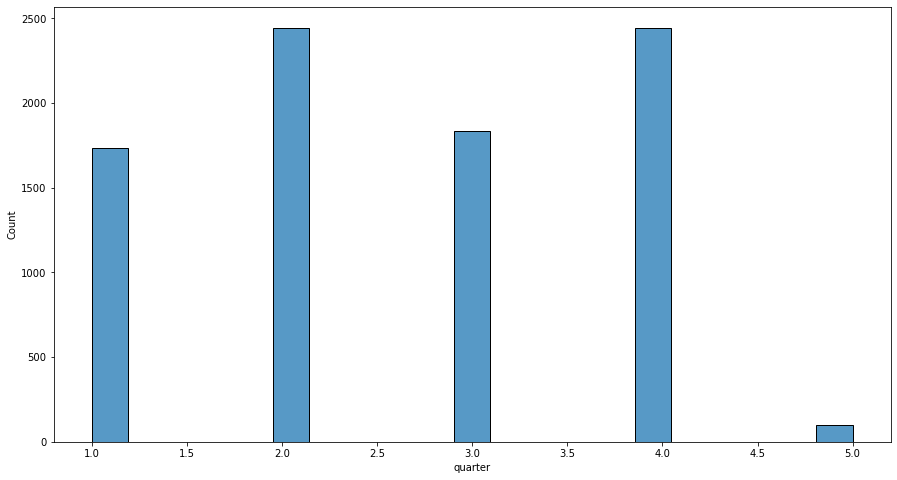

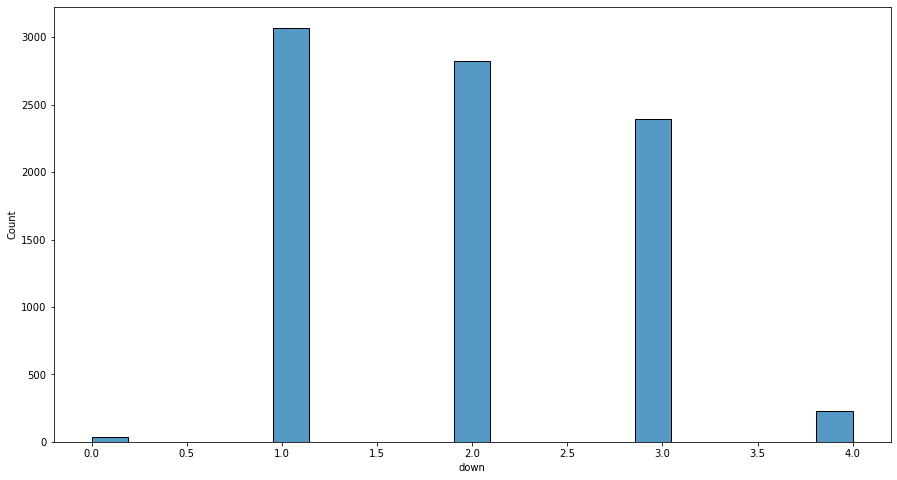

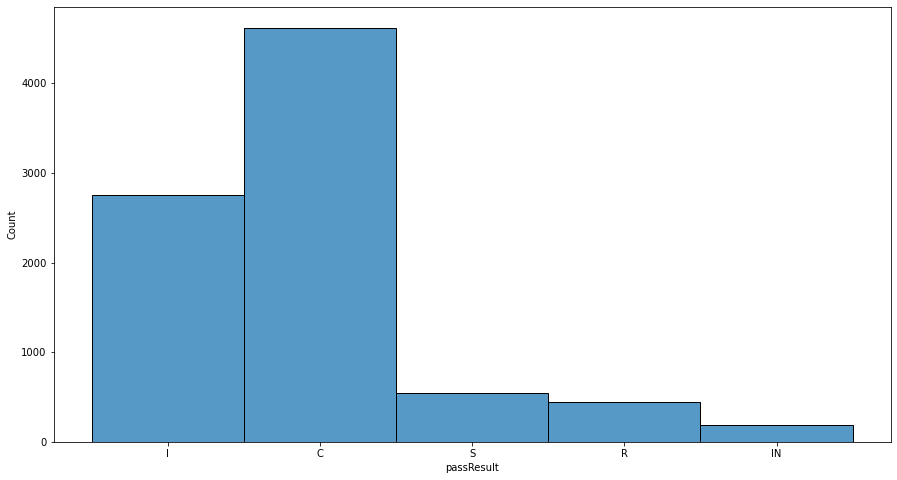

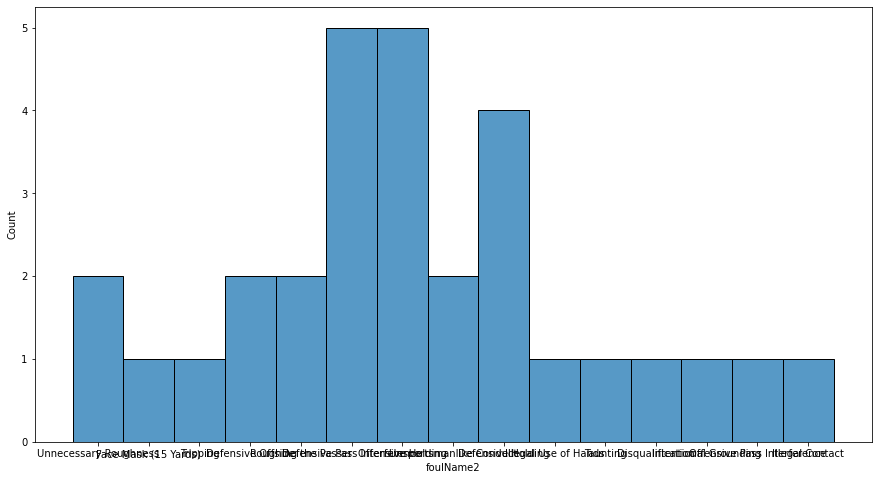

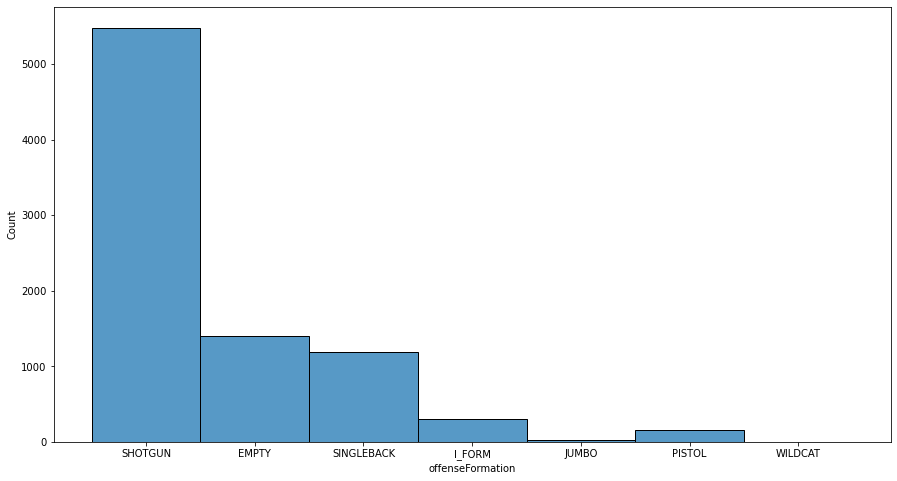

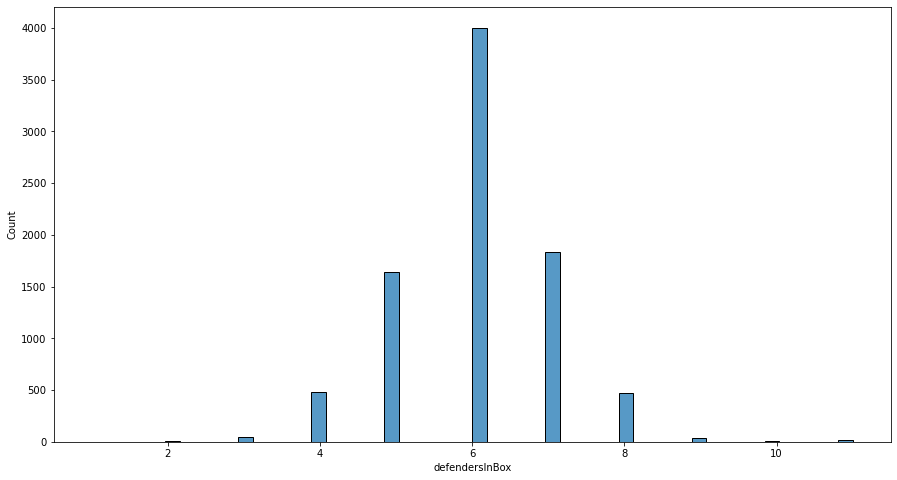

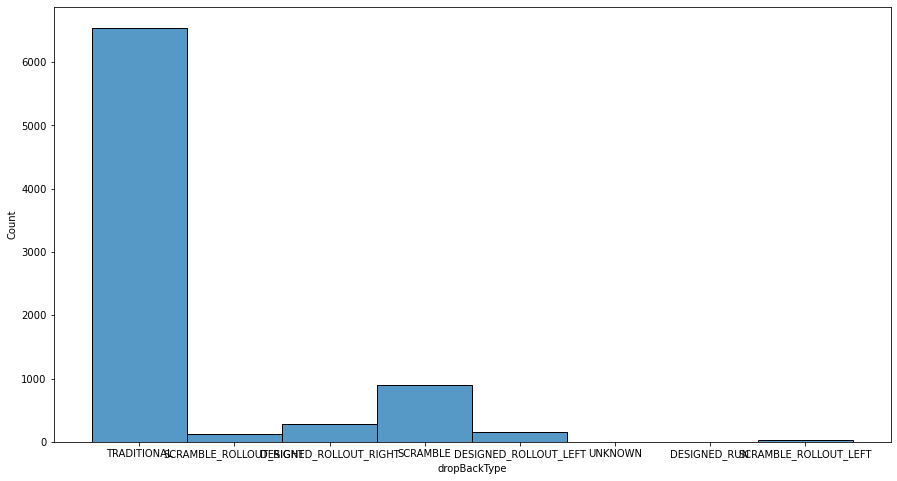

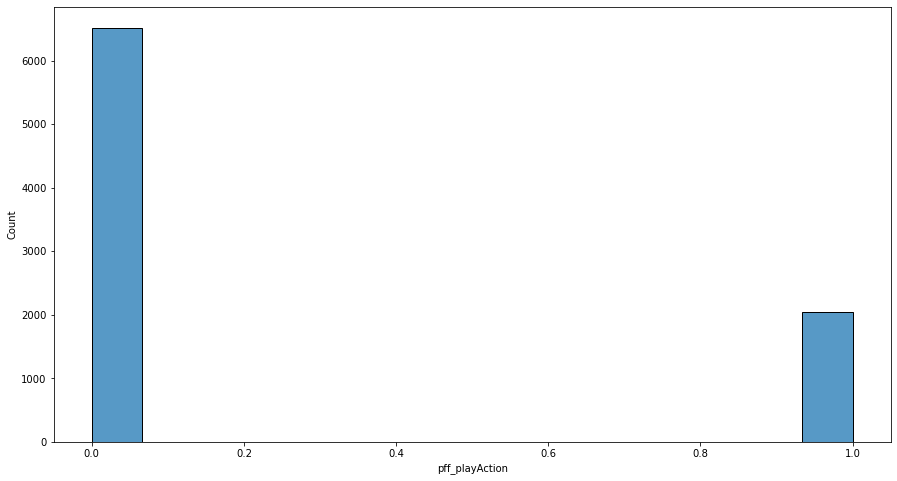

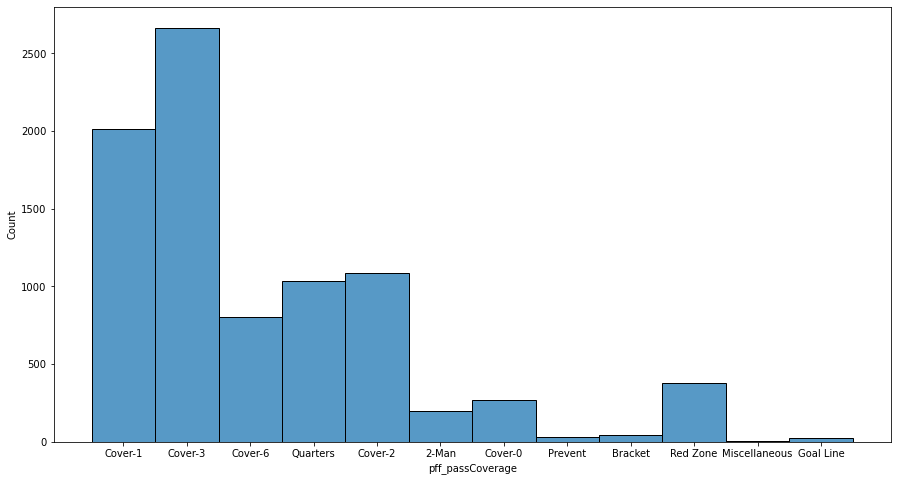

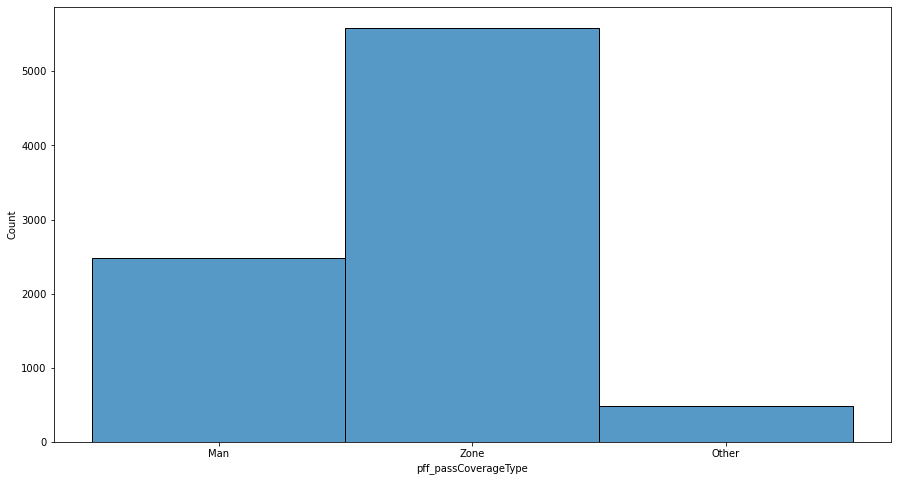

In [7]:
for col in df.columns:
    if df[col].nunique() > 1 and df[col].nunique() <= 15:
        plt.figure(figsize = (15,8))
        sns.histplot(df[col])
        plt.show()
        

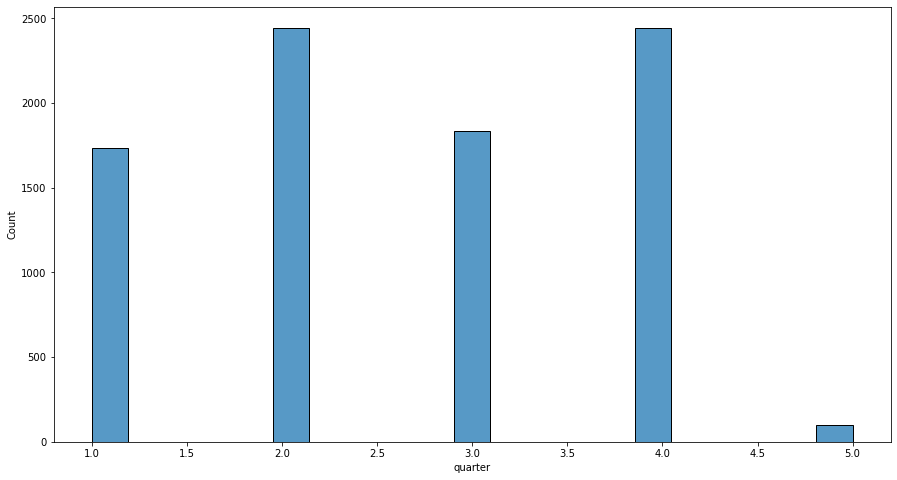

In [8]:
plt.figure(figsize = (15,8))
sns.histplot(df['quarter'])
plt.show()
        

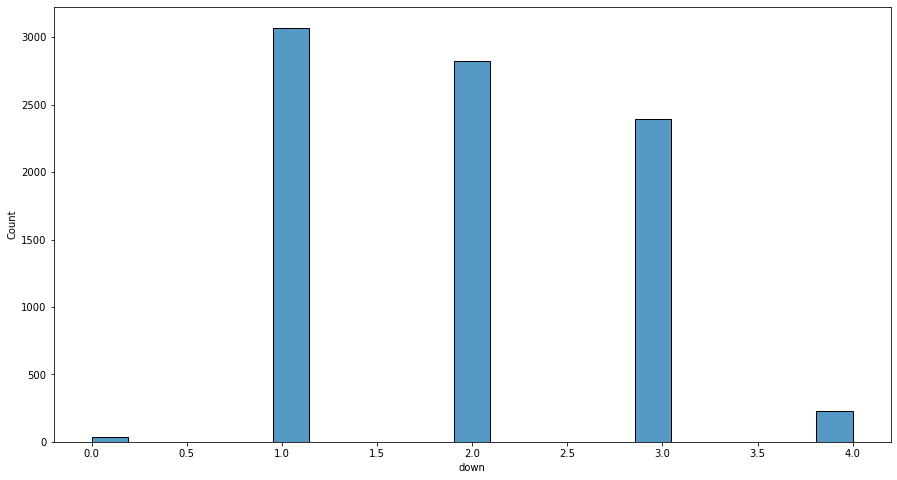

In [9]:
plt.figure(figsize = (15,8))
sns.histplot(df['down'])
plt.show()

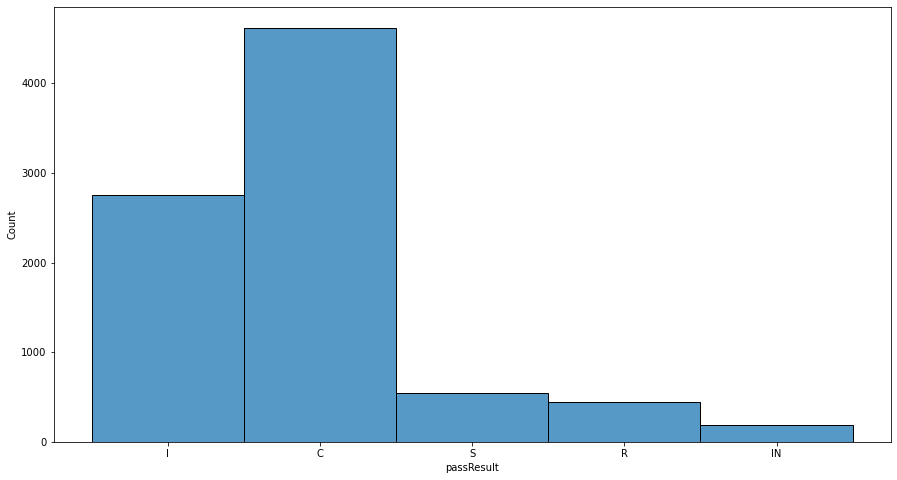

In [10]:
plt.figure(figsize = (15,8))
sns.histplot(df['passResult'])
plt.show()

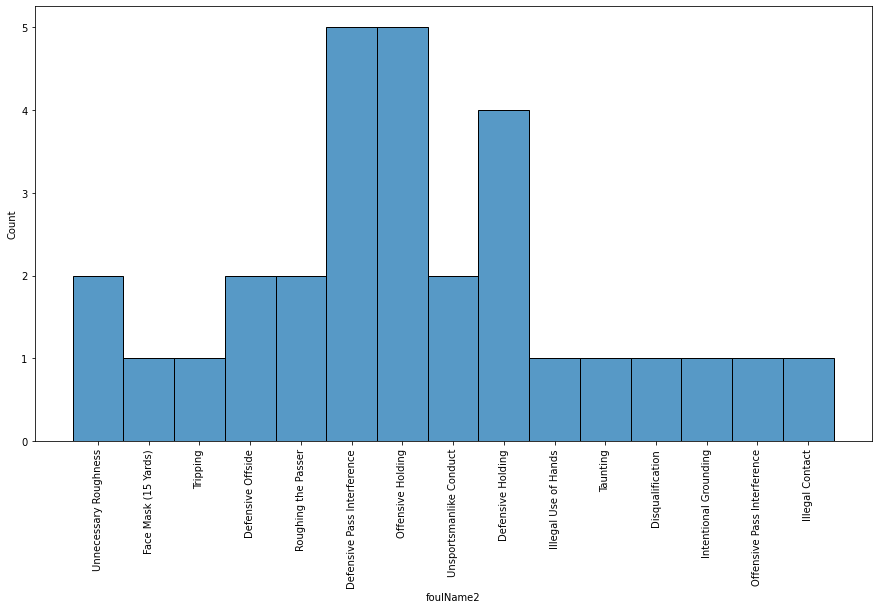

In [12]:
plt.figure(figsize = (15,8))
sns.histplot(df['foulName2'])
plt.xticks(rotation=90)
plt.show()

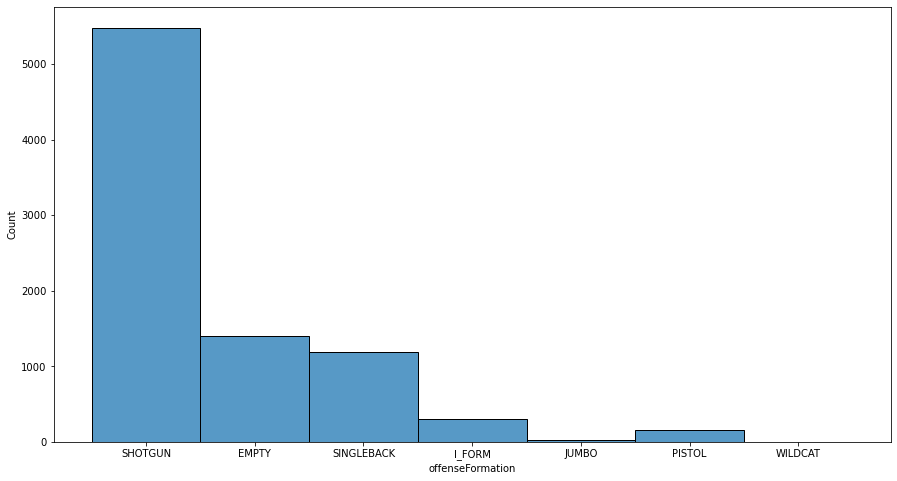

In [13]:
plt.figure(figsize = (15,8))
sns.histplot(df['offenseFormation'])
plt.show()

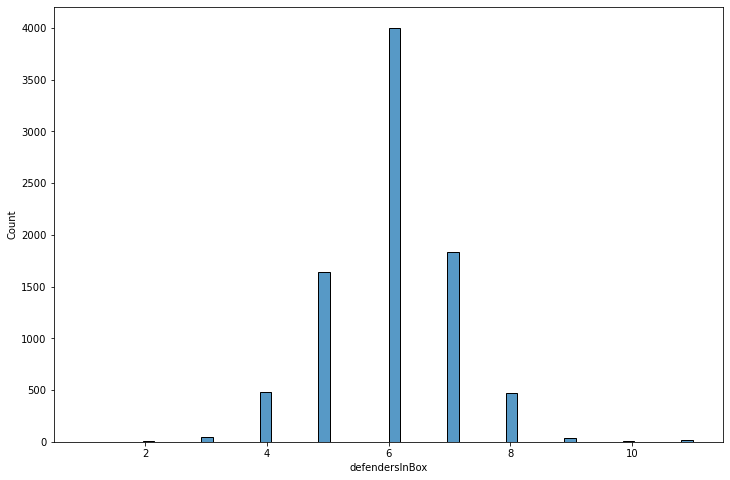

In [19]:
plt.figure(figsize = (12,8))
sns.histplot(df['defendersInBox'])
plt.show()

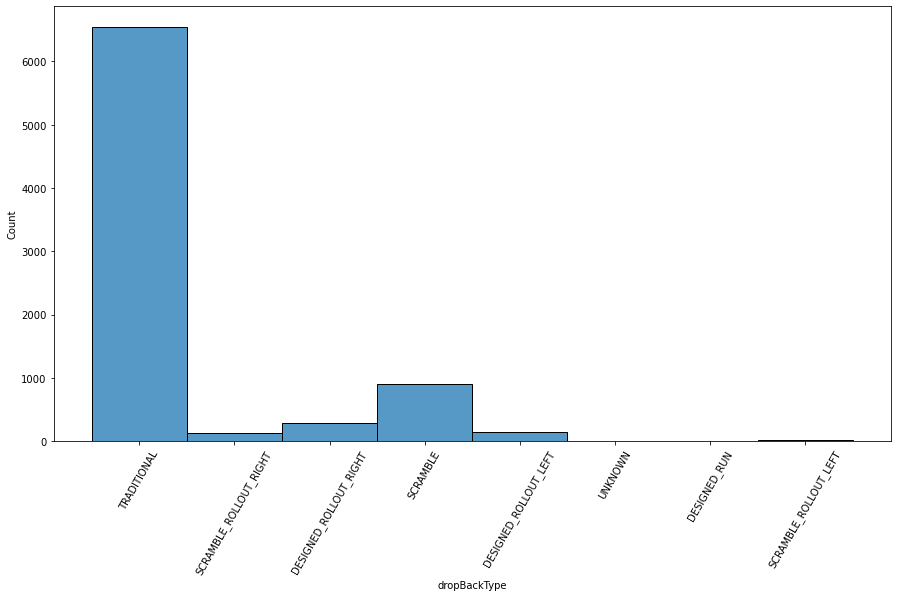

In [23]:
plt.figure(figsize = (15,8))
sns.histplot(df['dropBackType'])
plt.xticks(rotation=60)
plt.show()

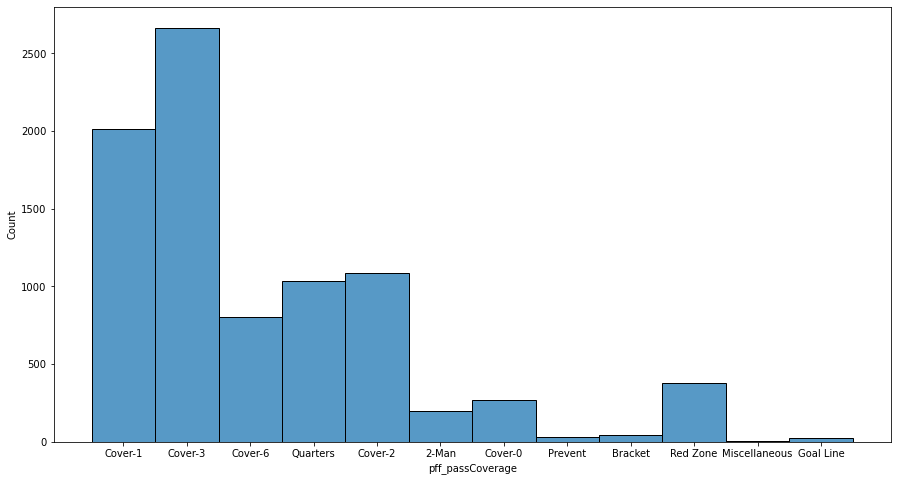

In [25]:
plt.figure(figsize = (15,8))
sns.histplot(df['pff_passCoverage'])
plt.show()

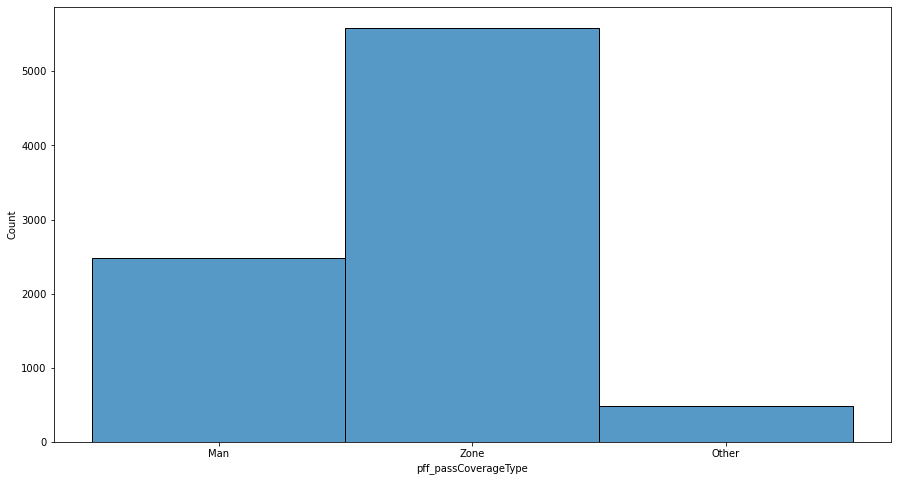

In [28]:
plt.figure(figsize = (15,8))
sns.histplot(df['pff_passCoverageType'])
plt.show()